### Load MNIST dataset

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# scikit-learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# common imports
import numpy as np

In [4]:
# import function to scikit-learn datasets
from sklearn.datasets import fetch_openml

# load specified dataset (MNIST)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# print type of dataset
type(mnist)

sklearn.utils.Bunch

Bunch objects are sometimes used as an output for functions and methods. They extend dictionaries by enabling values to be accessed by key, bunch["value_key"], or by an attribute, bunch.value_key.\
=> dictionary

In [5]:
# Reminder of how dicts work
example = {'name': 'somename', 'age': 15}
example.keys()

dict_keys(['name', 'age'])

In [6]:
# let us check out the keys of the mnist dataset
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Datasets loaded by Scikit-Learn generally have a similar dictionary structure, including the following:\
* __DESCR__ a key describing the dataset
* __data__ a key containing an array with one row per instance and one column per feature
* __target__ a key containing an array with labels, one for each row of the data key

In [7]:
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

### Prepare the MNIST dataset

$f(X) = y$

$X$ is the data that we have and\
$y$ is what we want to predict

In this example, we have images of handwritten digits $X$ and want to predict the digit $y$. In ML, we show the algorithm examples of X and y so that it learns the function $f(X) = y$. If it is successful, we can present $X$ to the algorithm that we did not train with and still get the $y$.

In [8]:
X, y = mnist["data"], mnist["target"]

In [9]:
type(X)

numpy.ndarray

In [10]:
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

### Plot data

In [12]:
# import plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

In [13]:
# numpy type
print(type(X))

example_digit = X[0]
print(example_digit.shape)

<class 'numpy.ndarray'>
(784,)


In [14]:
# change shape
example_digit = example_digit.reshape(28, 28)
print(example_digit.shape)

(28, 28)


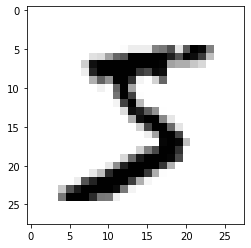

In [15]:
# plot example digit
plt.imshow(example_digit, cmap=mpl.cm.binary)
#plt.axis("off")
plt.show()

In [16]:
# plot label of example image
print(y[0])
print(type(y[0]))

5
<class 'str'>


In [17]:
# convert string labels to int
y = y.astype(np.uint8)

In [18]:
# function to quickly plot an image
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

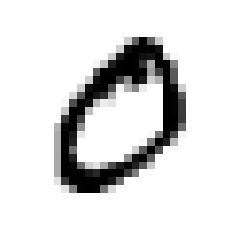

In [19]:
# quickly plot a single digit
plot_digit(X[1])

In [20]:
# function to quickly plot several digits
def plot_digits(instances, **options):
    size = 28
    images = [instance.reshape(size,size) for instance in instances]
    image = np.concatenate(images, axis=1)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

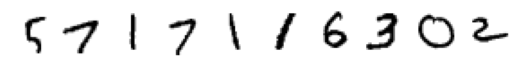

In [21]:
# quickly plot several digits
plt.figure(figsize=(9,9))
plot_digits(X[100:110])
plt.show()

### Prepare data for machine learning

In [22]:
# how many images do we have
len(X)

70000

In [23]:
# we use the first 60000 for training and test with the other 10000 images
X_train, X_test, y_train, y_test = X[:100], X[100:], y[:100], y[100:]

### Train classifier

In [24]:
# import support vector machine
import sklearn.svm

In [25]:
# specify the parameter of the SVM
classifier = sklearn.svm.SVC(C=10, gamma="scale", kernel="poly") #gamma=0.1 degree=3

# train the SVM
classifier.fit(X_train, y_train)

SVC(C=10, kernel='poly')

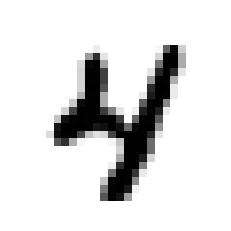

In [26]:
# take a test digit
test_digit = X[12121]
plot_digit(test_digit)

In [27]:
# see label for test digit
print(y[12121])

4


In [28]:
# see prediction for test digit
print(classifier.predict([X[12121]]))

[4]


In [29]:
# see propability for all classes
classifier.decision_function([X[12121]])

array([[-0.27831745,  5.82217802,  0.72414032,  2.85240395,  9.30320665,
         3.83670072,  4.8744213 ,  7.20637122,  1.74812151,  8.27550294]])

In [30]:
# see the classes to understand which received which score
classifier.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Evaluation

In [31]:
# trainings accuracy
wrong_images = X_train[(classifier.predict(X_train)-y_train) != 0]
percentage = ((1-len(wrong_images)/len(X_train)) * 100)
print("Accuracy Train " + str(percentage))

Accuracy Train 100.0


In [32]:
# test accuracy
wrong_images = X_test[(classifier.predict(X_test)-y_test) != 0]
percentage = ((1-len(wrong_images)/len(X_test)) * 100)
print("Accuracy Test " + str(percentage))

Accuracy Test 58.92989985693848


Accuracy is strongly influenced by the distribution of the classes in the test data.

#### Cross Validation
[Find more information on cross validation here.](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

In [33]:
# cross validation score
from sklearn.model_selection import cross_val_score

print(cross_val_score(classifier, X_train, y_train, cv=3, scoring="accuracy"))

[0.67647059 0.63636364 0.84848485]


In [34]:
# prediction of classifier
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(classifier, X_train, y_train, cv=3)
print(y_train_pred)

[1 0 1 1 9 9 1 3 1 4 3 1 3 6 1 7 1 9 1 9 4 0 9 1 1 2 1 3 7 1 1 1 1 9 0 1 6
 0 7 6 1 8 1 9 1 9 1 1 1 3 1 0 7 1 4 8 0 9 4 1 4 1 6 0 6 5 6 1 1 0 1 7 1 6
 3 0 1 1 1 7 6 0 2 6 7 8 1 9 0 4 6 7 4 6 8 0 7 8 3 1]


#### Precision

In [35]:
from sklearn.metrics import precision_score

precision_score(y_train, y_train_pred, average='weighted')

0.8456190476190476

#### Recall

In [36]:
from sklearn.metrics import recall_score

recall_score(y_train, y_train_pred, average='weighted')

0.72

#### F1 Score

In [37]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred, average='weighted')

0.7283140672193305

#### Confusion Matrix

In [38]:
# confusing matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_pred))

[[12  1  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  2  2  0  0  0  0  1  0  1]
 [ 0  4  0  7  0  0  0  0  0  0]
 [ 0  4  0  0  6  0  1  0  0  0]
 [ 0  4  0  0  0  1  0  0  0  0]
 [ 0  2  0  0  0  0  9  0  0  0]
 [ 0  2  0  0  0  0  0  8  0  0]
 [ 0  2  0  0  0  0  0  0  5  1]
 [ 0  1  0  0  1  0  1  0  0  8]]


In [39]:
cm = confusion_matrix(y_train, y_train_pred, normalize='true')
print(cm)

[[0.92307692 0.07692308 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.33333333 0.33333333 0.         0.         0.
  0.         0.16666667 0.         0.16666667]
 [0.         0.36363636 0.         0.63636364 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.36363636 0.         0.         0.54545455 0.
  0.09090909 0.         0.         0.        ]
 [0.         0.8        0.         0.         0.         0.2
  0.         0.         0.         0.        ]
 [0.         0.18181818 0.         0.         0.         0.
  0.81818182 0.         0.         0.        ]
 [0.         0.2        0.         0.         0.         0.
  0.         0.8        0.         0.        ]
 [0.         0.25       0.         0.         0.         0.
  0.         0.         0.625      0.125     ]
 [0.         0.09090909 0.         0

In [40]:
import pandas as pd
import seaborn as sn

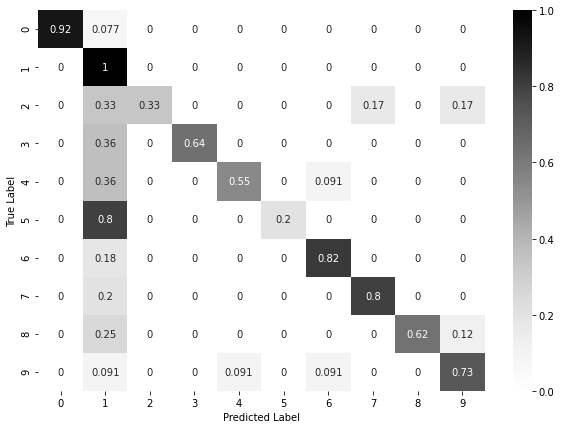

In [41]:
set_digits = { 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 }

df_cm = pd.DataFrame(cm, index=set_digits, columns=set_digits)
plt.figure(figsize = (10,7))
sn_plot = sn.heatmap(df_cm, annot=True, cmap="Greys")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.39      1.00      0.56        14
           2       1.00      0.33      0.50         6
           3       1.00      0.64      0.78        11
           4       0.86      0.55      0.67        11
           5       1.00      0.20      0.33         5
           6       0.82      0.82      0.82        11
           7       0.89      0.80      0.84        10
           8       1.00      0.62      0.77         8
           9       0.80      0.73      0.76        11

    accuracy                           0.72       100
   macro avg       0.88      0.66      0.70       100
weighted avg       0.85      0.72      0.73       100

